In [25]:
from pathlib import Path
import tflite
import tvm
from tvm import relay, transform
from tvm import te
import matplotlib.pyplot as plt
import imageio
import cv2
import numpy as np

In [3]:
model_path = Path.cwd().parent / 'models' / 'face_landmark.tflite'
model_path.exists()

True

In [6]:
with open(model_path, 'rb') as f:
    tflite_model_buf = f.read()
    tflite_model = tflite.Model.GetRootAsModel(tflite_model_buf, 0)
    input_tensor = "input_1"
    input_shape  = (5, 192, 192, 3)
    input_dtype  = "float32"
    
    mod, params = relay.frontend.from_tflite(
        tflite_model, 
        shape_dict = {input_tensor: input_shape},
        dtype_dict = {input_tensor: input_dtype}
    )
    target = "llvm"
    with transform.PassContext(opt_level=3):
        lib=relay.build(mod, target, params=params)

conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with autotvm.
conv2d NHWC layout is not optimized for x86 with autotvm.
depthwise_conv2d NHWC layout is not optimized for x86 with a

In [7]:
video_path = Path.cwd().parent / "build" / "closeup_1.mp4"
video_path.exists()

True

In [32]:
reader = imageio.get_reader(str(video_path))

In [33]:
frames = []
for idx, frame in enumerate(reader):
    if idx == 5:
        break
    frame = cv2.resize(frame, (192, 192))
    frame = frame * 1.0 / 255.0
    frame = frame.astype(np.float32)
    frames.append(frame)
len(frames)

5

In [34]:
import numpy as np
np.array(frames[0]).shape

(192, 192, 3)

In [41]:
image_data = np.array(frames)

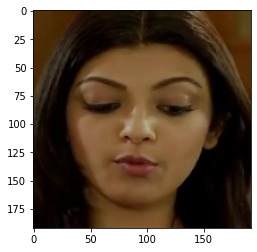

In [40]:
plt.imshow(image_data[4])
plt.show()

In [42]:
import tvm
from tvm import te
from tvm.contrib import graph_executor as runtime

# Create a runtime executor module
module = runtime.GraphModule(lib["default"](tvm.cpu()))

# Feed input data
module.set_input(input_tensor, tvm.nd.array(image_data))

# Run
module.run()



In [43]:
# Get output
landmarks = module.get_output(0).numpy()
scores = module.get_output(1).numpy()

In [44]:
scores

array([[[[28.454144]]],


       [[[30.117607]]],


       [[[30.267029]]],


       [[[30.581034]]],


       [[[30.366508]]]], dtype=float32)